In [2]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt

In [18]:
a =np.arange(-1,1,0.005)
b = asarray([(np.sin(i*np.pi))*3 for i in a])
print(a.min(), a.max(), b.min(), b.max())

-1.0 0.9950000000000019 -3.0 3.0


In [19]:
a = a.reshape((len(a),1))
b = b.reshape((len(b),1))

In [20]:
scale_a = MinMaxScaler()
a = scale_a.fit_transform(a)
scale_b = MinMaxScaler()
b = scale_b.fit_transform(b)
print(a.min(),a.max(), b.min(), b.max())


0.0 1.0 0.0 1.0


In [21]:
modelo = Sequential()
modelo.add(Dense(10, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
modelo.add(Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
modelo.add(Dense(1))

In [22]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [24]:
modelo.compile(loss='mse', optimizer='Adam')

In [26]:
modelo.fit(a, b, epochs=350, batch_size=10, verbose=1)

Epoch 1/350
40/40 [==============================] - 0s 2ms/step - loss: 1.0956e-05
Epoch 2/350
40/40 [==============================] - 0s 2ms/step - loss: 1.3461e-05
Epoch 3/350
40/40 [==============================] - 0s 2ms/step - loss: 1.2711e-05
Epoch 4/350
40/40 [==============================] - 0s 2ms/step - loss: 1.0926e-05
Epoch 5/350
40/40 [==============================] - 0s 2ms/step - loss: 9.9414e-06
Epoch 6/350
40/40 [==============================] - 0s 2ms/step - loss: 9.8718e-06
Epoch 7/350
40/40 [==============================] - 0s 2ms/step - loss: 9.7071e-06
Epoch 8/350
40/40 [==============================] - 0s 2ms/step - loss: 1.1796e-05
Epoch 9/350
40/40 [==============================] - 0s 2ms/step - loss: 1.0685e-05
Epoch 10/350
40/40 [==============================] - 0s 2ms/step - loss: 1.5739e-05
Epoch 11/350
40/40 [==============================] - 0s 2ms/step - loss: 1.3258e-05
Epoch 12/350
40/40 [==============================] - 0s 2ms/step - loss: 

In [27]:
b_pred = modelo.predict(a)

13/13 [==============================] - 0s 1ms/step


In [29]:
a_plot = scale_a.inverse_transform(a)
b_pred_plot = scale_b.inverse_transform(b_pred)

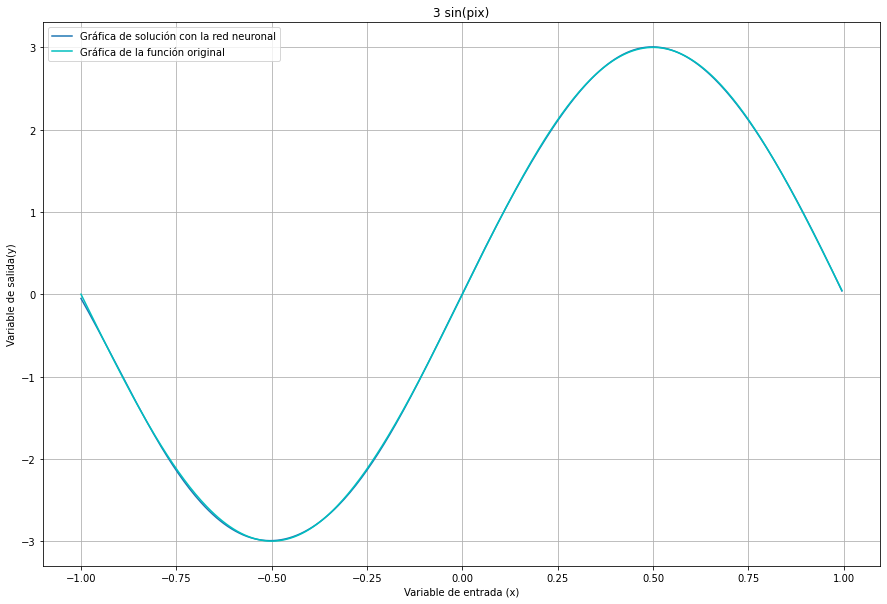

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(a_plot, b_pred_plot, label='Gráfica de solución con la red neuronal')
plt.plot(a_plot,(np.sin(a_plot*np.pi))*3, label= 'Gráfica de la función original', color='c')

plt.title('3 sin(pix)')
plt.xlabel('Variable de entrada (x)')
plt.ylabel('Variable de salida(y)')
plt.grid(which='both')
plt.legend()
plt.show()

In [31]:
b = (np.sin(a_plot*np.pi))*3
# reporte del error del modelo
print('MSE: %.3f' % mean_squared_error(b, b_pred_plot))

MSE: 0.000
